In [1]:
# A transit-timing example:

In [2]:
# Read in the transit-timing code:
include("../src/ttv.jl")

findtransit3! (generic function with 2 methods)

In [3]:
# Specify the initial conditions:

# Mass of star:
mstar = 0.82

# First planet:
m_1 = 3.18e-4
e1 = 0.0069
om1 = 0.0
p1 = 228.774
t01 = 0.0

# Second planet:
m_2 = 3e-6
e2  = 0.0054
om2 = 0.0
p2 = 221.717
t02 = -p2/6  # We want mean anomaly to be +60 deg, so its
             # transit should have about occurred 1/6 of an orbit 
             # prior to the initial time.

# Now, integration quantities:
t0 = 0.0  # initial time
h  = 10.0 # time step
tmax = 9837.282 # Maximum time of integration

# Okay, set up array for orbital elements
n = 3
elements = zeros(n,7)
elements[1,1] = mstar
elements[2,:] = [m_1,p1,t01,e1*cos(om1),e1*sin(om1),pi/2,0.0]
elements[3,:] = [m_2,p2,t02,e2*cos(om2),e2*sin(om2),pi/2,0.0]
count = zeros(Int64,n)
tt = zeros(n,44)
rstar = 1e12

# Now, run the ttv function:
dq = ttv_elements!(n,t0,h,tmax,elements,tt,count,0.0,0,0,rstar)

# Print the times:
t1 = tt[2,1:count[2]]
println(t1)

[113.3811834634834, 342.1505437871499, 570.9128405267103, 799.6656975665412, 1028.4078965983026, 1257.138891006447, 1485.8584873990928, 1714.5666541125847, 1943.2634301437913, 2171.9489191721063, 2400.6233642906955, 2629.2873094758834, 2857.941863770591, 3086.589097166581, 3315.2326233626623, 3543.8784635607726, 3772.536148822925, 4001.21857507202, 4229.935527508095, 4458.68339970893, 4687.449252125066, 4916.221255911535, 5144.99155877681, 5373.755439991609, 5602.510228167527, 5831.254526989078, 6059.9876904418925, 6288.709475903497, 6517.41983072623, 6746.118783456111, 6974.806422233869, 7203.482953910205, 7432.148847969496, 7660.805079278072, 7889.453495544048, 8118.097358062184, 8346.742144187392, 8575.39663855674, 8804.073308912828, 9032.783446335414, 9261.526286930133, 9490.289727440198, 9719.061278612948]


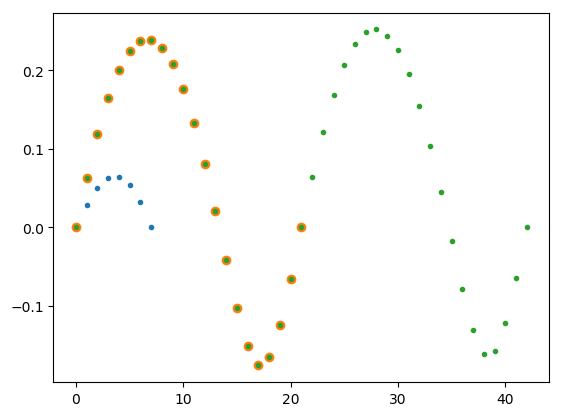

228.7407815213002
228.7066701165739
228.7066689321301


In [4]:
# Plot these times with a mean ephemeris removed:
using Statistics
using PyPlot

# Three different lengths of transit timing sequences:
nplot = [8,22,43]
for iplot=1:3
  pavg = mean(t1[2:nplot[iplot]] - t1[1:nplot[iplot]-1])
  it = collect(0:1:nplot[iplot]-1)
  ttv1 = t1[1:nplot[iplot]] .- it .* pavg .- t1[1]
  if iplot == 2
    plot(it,ttv1,"o")
  else
    plot(it,ttv1,".")
  end
  println(pavg)
end